In [23]:
from importlib import reload

import GPRutils
import vK2KGPR
import plotGPR

import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
import astropy.stats as stats

In [ ]:
# xi2 stats
# python standalone script that makes plots and such
# send kernel params before and after trying sigma clipping (on training and valid sets), check plots too

In [2]:
%%time
dataC = GPRutils.dataContainer()

CPU times: user 8 µs, sys: 1 µs, total: 9 µs
Wall time: 16 µs


In [3]:
%%time
dataC.load()

Exposure: 364215
Band: z
Number of objects: 110646


INFO: Query finished. [astroquery.utils.tap.core]
There were 10847 matches within 0.5 arcsec.
CPU times: user 27 s, sys: 3.93 s, total: 31 s
Wall time: 53.3 s


In [4]:
%%time
dataC.splitData(nSigma=4, train_size=0.80)

110355 total detections
8443 training set detections
2111 validation set detections
99801 prediiction set detections
CPU times: user 353 ms, sys: 35.4 ms, total: 388 ms
Wall time: 32.3 ms


In [5]:
%%time
GP = vK2KGPR.vonKarman2KernelGPR(dataC, printing=True, outDir=".")

CPU times: user 11.9 ms, sys: 987 µs, total: 12.9 ms
Wall time: 1.09 ms


In [6]:
%%time
GP.fitCorr()

/home/fortino/DESworkspace/vonkarmanFT.py:65: RuntimeWarning: divide by zero encountered in true_divide
  airy = (j1(kR)/(kR))**2
/home/fortino/DESworkspace/vonkarmanFT.py:65: RuntimeWarning: invalid value encountered in true_divide
  airy = (j1(kR)/(kR))**2
/home/fortino/DESworkspace/vonkarmanFT.py:75: RuntimeWarning: divide by zero encountered in true_divide
  w = np.where(kWind==0, 1., np.sin(kWind) / kWind)
/home/fortino/DESworkspace/vonkarmanFT.py:75: RuntimeWarning: invalid value encountered in true_divide
  w = np.where(kWind==0, 1., np.sin(kWind) / kWind)


   RSS: 2.1585876     var: 51.7934725     oS: 1.0000000       d: 0.1000000  wind_x: 0.0500000  wind_y: 0.0500000 
   RSS: 4.1920832     var: 59.5624934     oS: 1.0000000       d: 0.1000000  wind_x: 0.0500000  wind_y: 0.0500000 
   RSS: 2.3586841     var: 51.7934725     oS: 1.1500000       d: 0.1000000  wind_x: 0.0500000  wind_y: 0.0500000 
   RSS: 2.6613057     var: 51.7934725     oS: 1.0000000       d: 0.1150000  wind_x: 0.0500000  wind_y: 0.0500000 
   RSS: 2.2647566     var: 51.7934725     oS: 1.0000000       d: 0.1000000  wind_x: 0.0575000  wind_y: 0.0500000 
   RSS: 2.2356668     var: 51.7934725     oS: 1.0000000       d: 0.1000000  wind_x: 0.0500000  wind_y: 0.0575000 
   RSS: 1.2712798     var: 44.0244516     oS: 1.0600000       d: 0.1060000  wind_x: 0.0530000  wind_y: 0.0530000 
   RSS: 1.1530206     var: 36.2554308     oS: 1.0900000       d: 0.1090000  wind_x: 0.0545000  wind_y: 0.0545000 
   RSS: 1.3387348     var: 45.5782558     oS: 1.0960000       d: 0.0886000  wind_x: 0.05

In [ ]:
%%time
GP.optimize()

  xi_+: 6.7235208     var: 39.6116478     oS: 1.0441600       d: 0.0986560  wind_x: 0.0489080  wind_y: 0.0594080 
  xi_+: 6.7369354     var: 45.5533949     oS: 1.0441600       d: 0.0986560  wind_x: 0.0489080  wind_y: 0.0594080 
  xi_+: 6.7309187     var: 39.6116478     oS: 1.2007840       d: 0.0986560  wind_x: 0.0489080  wind_y: 0.0594080 
  xi_+: 7.0952684     var: 39.6116478     oS: 1.0441600       d: 0.1134544  wind_x: 0.0489080  wind_y: 0.0594080 
  xi_+: 6.6934084     var: 39.6116478     oS: 1.0441600       d: 0.0986560  wind_x: 0.0562442  wind_y: 0.0594080 
  xi_+: 6.8270701     var: 39.6116478     oS: 1.0441600       d: 0.0986560  wind_x: 0.0489080  wind_y: 0.0683192 
  xi_+: 6.7565174     var: 41.9883466     oS: 1.1068096       d: 0.0838576  wind_x: 0.0518425  wind_y: 0.0629725 
  xi_+: 6.6237188     var: 42.9390262     oS: 1.1318694       d: 0.0927366  wind_x: 0.0530163  wind_y: 0.0519226 
  xi_+: 6.6226353     var: 44.6027154     oS: 1.1757242       d: 0.0897770  wind_x: 0.05

In [ ]:
%%time
GP.fit(GP.opt_result_GP[0])

In [67]:
%%time
GP.predict(GP.dC.Xvalid)

CPU times: user 4min 27s, sys: 32.6 s, total: 5min
Wall time: 16 s


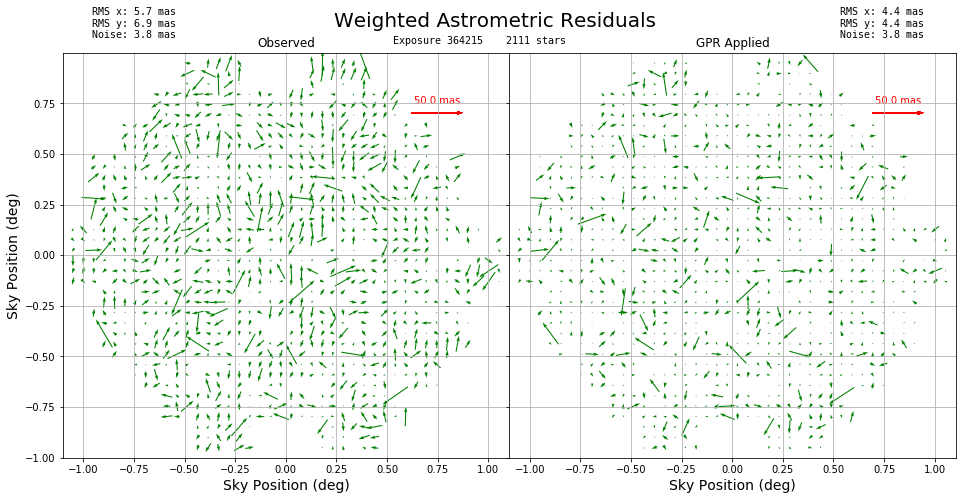

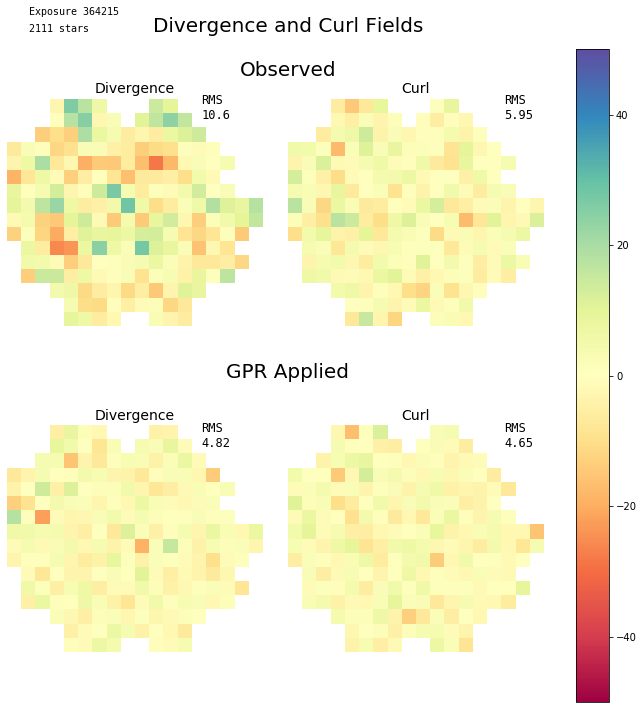

/home/fortino/DESworkspace/GPRutils.py:764: RuntimeWarning: invalid value encountered in true_divide
  logr /= counts
/home/fortino/DESworkspace/GPRutils.py:770: RuntimeWarning: invalid value encountered in true_divide
  xiplus /= counts
/home/fortino/DESworkspace/GPRutils.py:775: RuntimeWarning: invalid value encountered in true_divide
  xiz2 /= counts
/home/fortino/DESworkspace/GPRutils.py:784: RuntimeWarning: invalid value encountered in true_divide
  ximinus /= counts
/home/fortino/DESworkspace/plotGPR.py:499: RuntimeWarning: invalid value encountered in less_equal
  ind = np.where(r <= sep.to(u.deg).value)[0]


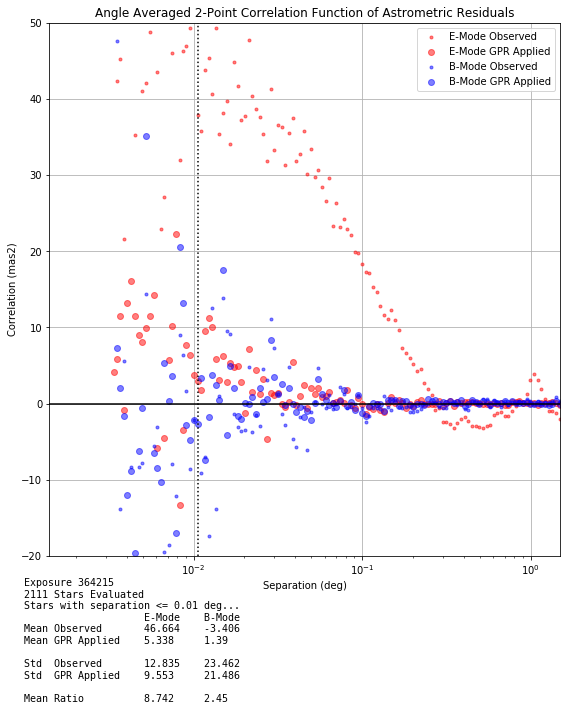

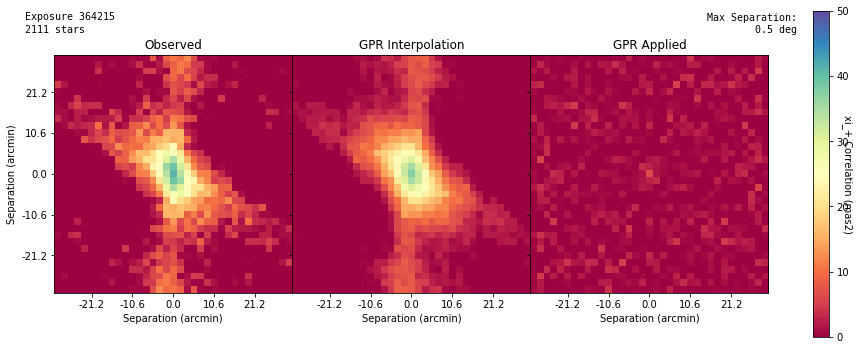

In [68]:
x = dataC.Xvalid[:, 0]*u.deg
y = dataC.Xvalid[:, 1]*u.deg
dx = dataC.Yvalid[:, 0]*u.mas
dy = dataC.Yvalid[:, 1]*u.mas
err = dataC.Evalid[:, 0]*u.mas

x2 = dataC.Xvalid[:, 0]*u.deg
y2 = dataC.Xvalid[:, 1]*u.deg
dx2 = dataC.Yvalid[:, 0]*u.mas - dataC.fbar_s[:, 0]*u.mas
dy2 = dataC.Yvalid[:, 1]*u.mas - dataC.fbar_s[:, 1]*u.mas
err2 = dataC.Evalid[:, 0]*u.mas

plotGPR.AstrometricResiduals(
    x, y, dx, dy, err,
    x2=x2, y2=y2, dx2=dx2, dy2=dy2, err2=err2,
    exposure=dataC.expNum,
    pixelsPerBin=700,
    scale=200*u.mas)

plotGPR.DivCurl(
    x, y, dx, dy, err,
    x2=x2, y2=y2, dx2=dx2, dy2=dy2, err2=err2,
    pixelsPerBin=1500,
    exposure=dataC.expNum)

plotGPR.Correlation(
    x, y, dx, dy,
    x2=x2, y2=y2, dx2=dx2, dy2=dy2,
    exposure=dataC.expNum,
    ylim=(-20, 50))

plotGPR.Correlation2D(
    x, y, dx, dy,
    x2=x2, y2=y2, dx2=dx2, dy2=dy2,
    exposure=dataC.expNum,
    nBins=35,
    vmin=0*u.mas**2,
    vmax=50*u.mas**2,
    rmax=0.50*u.deg)

In [60]:
GP.predict(GP.dC.Xtrain)

In [ ]:
dx2 = (dataC.Ytrain[:, 0]*u.mas - dataC.fbar_s[:, 0]*u.mas).value
dy2 = (dataC.Ytrain[:, 1]*u.mas - dataC.fbar_s[:, 1]*u.mas).value
mask = stats.sigma_clip(np.vstack([dx2, dy2]).T, sigma=4, axis=0).mask
mask = ~np.logical_or(*mask.T)

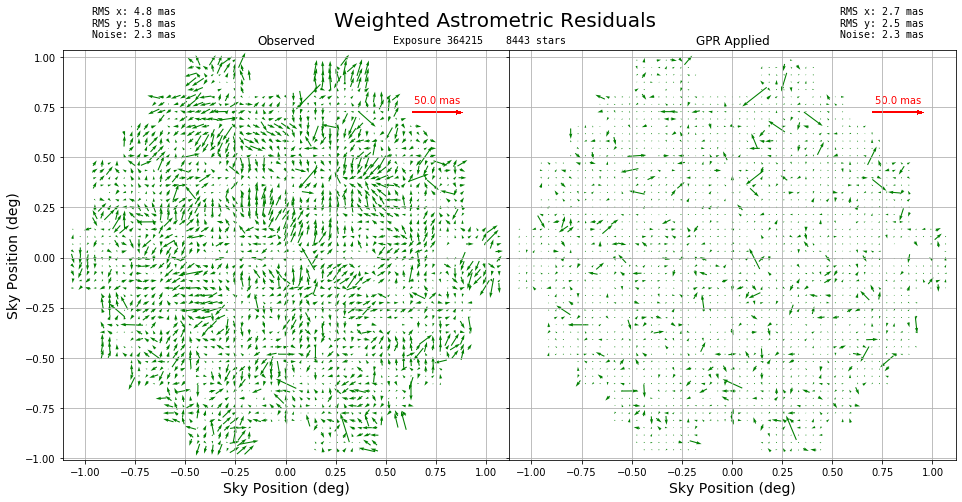

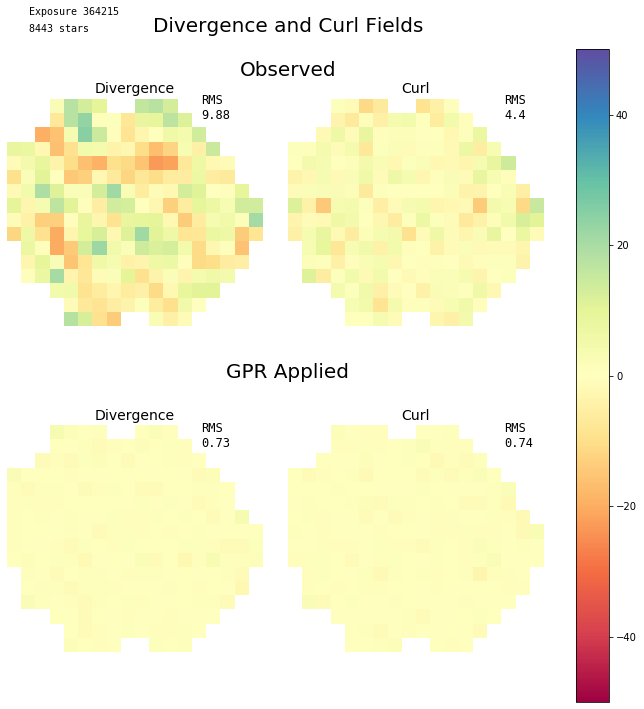

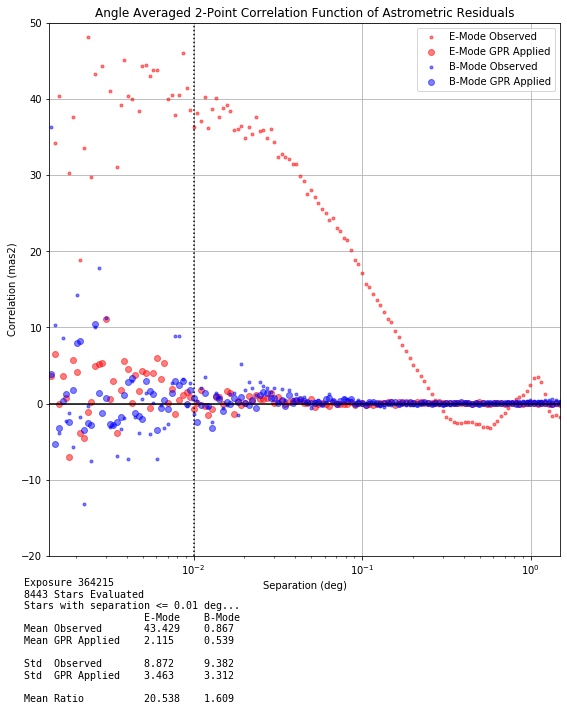

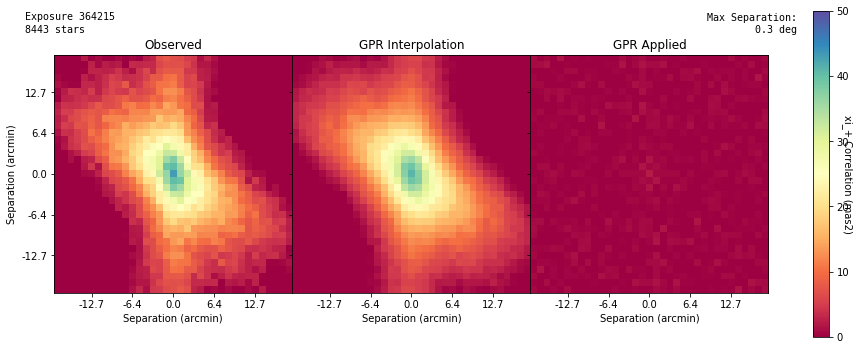

In [66]:
x = dataC.Xtrain[:, 0]*u.deg
y = dataC.Xtrain[:, 1]*u.deg
dx = dataC.Ytrain[:, 0]*u.mas
dy = dataC.Ytrain[:, 1]*u.mas
err = dataC.Etrain[:, 0]*u.mas

x2 = dataC.Xtrain[:, 0]*u.deg
y2 = dataC.Xtrain[:, 1]*u.deg
dx2 = dataC.Ytrain[:, 0]*u.mas - dataC.fbar_s[:, 0]*u.mas
dy2 = dataC.Ytrain[:, 1]*u.mas - dataC.fbar_s[:, 1]*u.mas
err2 = dataC.Etrain[:, 0]*u.mas

plotGPR.AstrometricResiduals(
    x, y, dx, dy, err,
    x2=x2, y2=y2, dx2=dx2, dy2=dy2, err2=err2,
    exposure=dataC.expNum,
    pixelsPerBin=500,
    scale=200*u.mas)

plotGPR.DivCurl(
    x, y, dx, dy, err,
    x2=x2, y2=y2, dx2=dx2, dy2=dy2, err2=err2,
    pixelsPerBin=1500,
    exposure=dataC.expNum)

plotGPR.Correlation(
    x, y, dx, dy,
    x2=x2, y2=y2, dx2=dx2, dy2=dy2,
    exposure=dataC.expNum,
    ylim=(-20, 50))

plotGPR.Correlation2D(
    x, y, dx, dy,
    x2=x2, y2=y2, dx2=dx2, dy2=dy2,
    exposure=dataC.expNum,
    nBins=35,
    vmin=0*u.mas**2,
    vmax=50*u.mas**2)

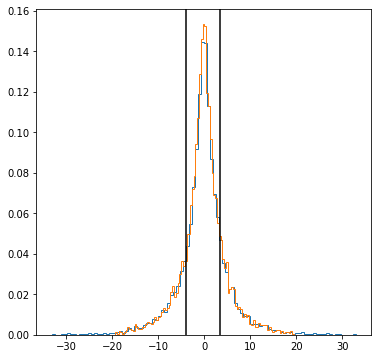

(8443,)
(8286,)


In [64]:
plt.figure(figsize=(6, 6))
plt.hist(dy2      , bins=100, log=False, density=True, histtype="step")
plt.hist(dy2[mask], bins=100, log=False, density=True, histtype="step")
dx2_1, dx2_2 = np.percentile(dx2, (16, 84))
plt.axvline(x=dx2_1, c="k")
plt.axvline(x=dx2_2, c="k")
plt.show()

print(dx2.shape)
print(dx2[mask].shape)

/home/fortino/DESworkspace/GPRutils.py:596: RuntimeWarning: invalid value encountered in true_divide
  sumWeights_x / sumWeights,
/home/fortino/DESworkspace/GPRutils.py:600: RuntimeWarning: invalid value encountered in true_divide
  sumWeights_y / sumWeights,
/home/fortino/DESworkspace/GPRutils.py:604: RuntimeWarning: divide by zero encountered in reciprocal
  sumWeights**-1.,
/home/fortino/DESworkspace/GPRutils.py:615: RuntimeWarning: invalid value encountered in less
  sumWeights < (maxErr**2.).value)
/home/fortino/DESworkspace/GPRutils.py:622: RuntimeWarning: invalid value encountered in greater
  RMS_x = np.std(sumWeights_x[sumWeights > 0.])*u.mas
/home/fortino/DESworkspace/GPRutils.py:623: RuntimeWarning: invalid value encountered in greater
  RMS_y = np.std(sumWeights_y[sumWeights > 0.])*u.mas
/home/fortino/DESworkspace/GPRutils.py:624: RuntimeWarning: invalid value encountered in greater
  noise = np.sqrt(np.mean(sumWeights[sumWeights > 0.]))*u.mas


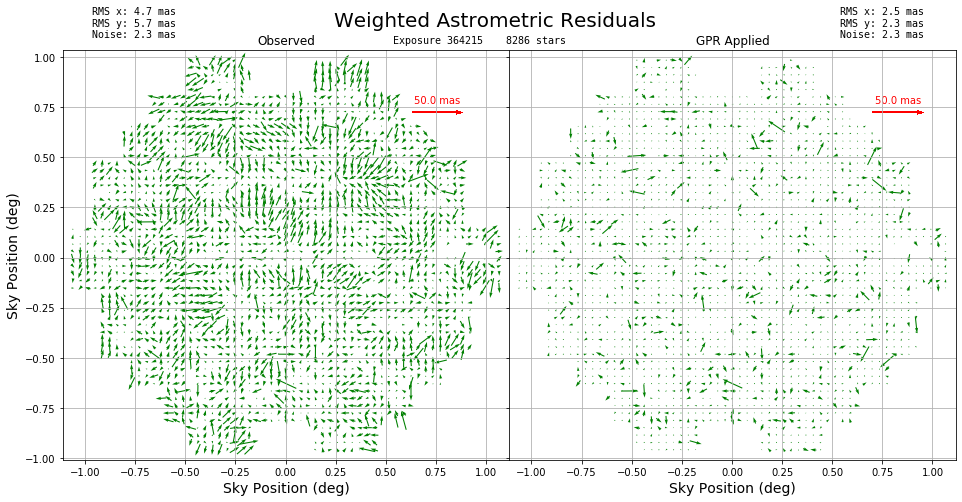

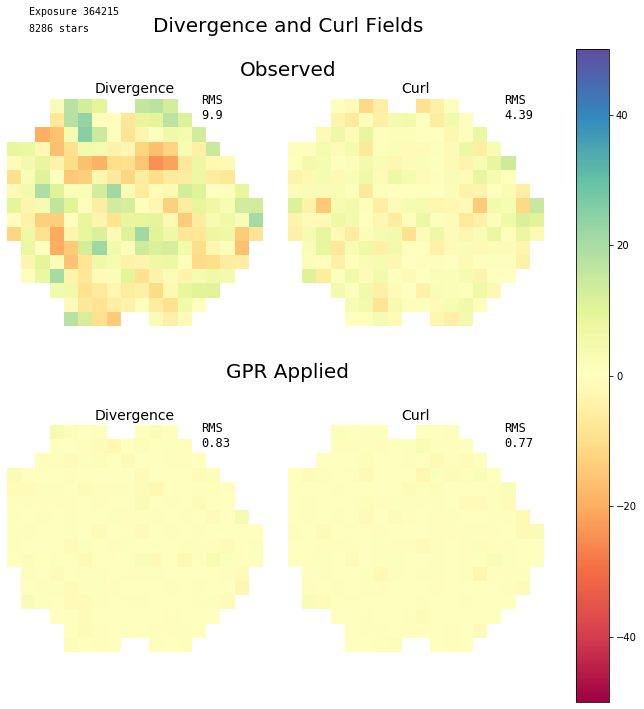

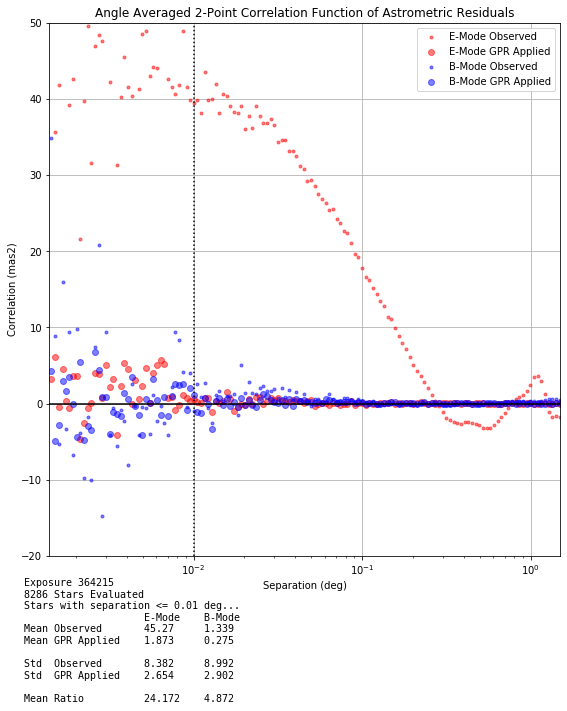

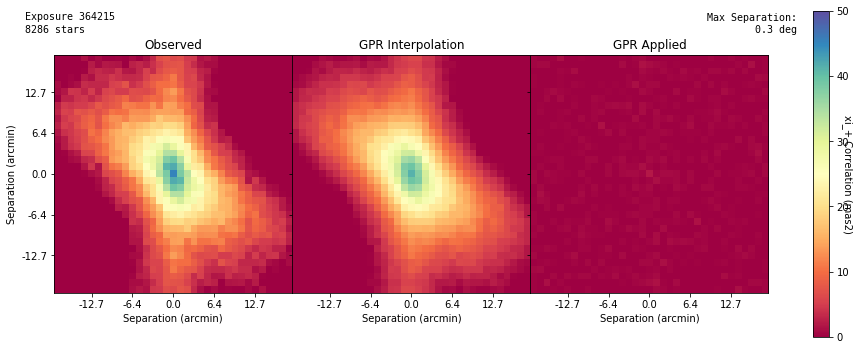

In [65]:
x = dataC.Xtrain[mask, 0]*u.deg
y = dataC.Xtrain[mask, 1]*u.deg
dx = dataC.Ytrain[mask, 0]*u.mas
dy = dataC.Ytrain[mask, 1]*u.mas
err = dataC.Etrain[mask, 0]*u.mas

x2 = dataC.Xtrain[mask, 0]*u.deg
y2 = dataC.Xtrain[mask, 1]*u.deg
dx2 = dataC.Ytrain[mask, 0]*u.mas - dataC.fbar_s[mask, 0]*u.mas
dy2 = dataC.Ytrain[mask, 1]*u.mas - dataC.fbar_s[mask, 1]*u.mas
err2 = dataC.Etrain[mask, 0]*u.mas

plotGPR.AstrometricResiduals(
    x, y, dx, dy, err,
    x2=x2, y2=y2, dx2=dx2, dy2=dy2, err2=err2,
    exposure=dataC.expNum,
    pixelsPerBin=500,
    scale=200*u.mas)

plotGPR.DivCurl(
    x, y, dx, dy, err,
    x2=x2, y2=y2, dx2=dx2, dy2=dy2, err2=err2,
    pixelsPerBin=1500,
    exposure=dataC.expNum)

plotGPR.Correlation(
    x, y, dx, dy,
    x2=x2, y2=y2, dx2=dx2, dy2=dy2,
    exposure=dataC.expNum,
    ylim=(-20, 50))

plotGPR.Correlation2D(
    x, y, dx, dy,
    x2=x2, y2=y2, dx2=dx2, dy2=dy2,
    exposure=dataC.expNum,
    nBins=35,
    vmin=0*u.mas**2,
    vmax=50*u.mas**2)